#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia de datos**
###Tecnológico de Monterrey

Actividad Semanal 7

**Regresión lineal polinomial**

###**Nombre del profesor: María de la Paz Rico
###**Nombre del estudiante: Gustavo René Ramos Ojeda
###**Matrícula: A01793599

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [175]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(42)

In [176]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [177]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

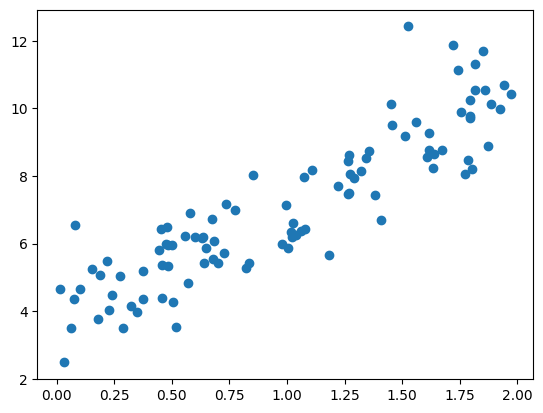

In [178]:
X = 2*np.random.rand(100, 1)
y = 3 * X+ 4 + np.random.randn(100, 1)
plt.scatter(X, y);

In [179]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [180]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [181]:
#X_fit[]

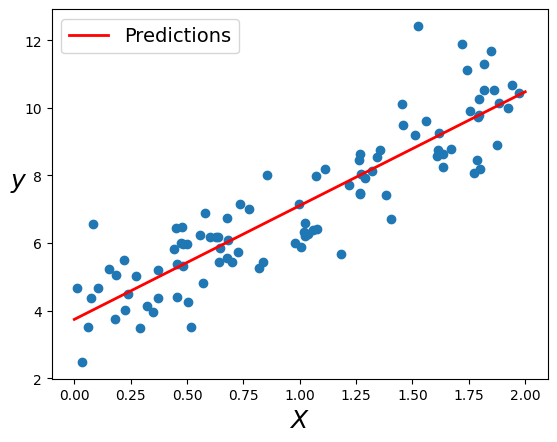

In [182]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [183]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [184]:
X_new.shape

(2, 1)

In [185]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [186]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [187]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [188]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3 #Se generan números
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #Con sus correspondientes resultados de la ecuación

print("X: "+ str(len(X)))
print("Y: "+ str(len(y)))

X: 100
Y: 100


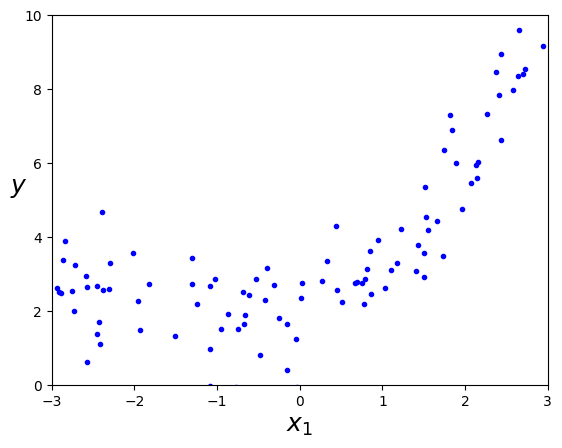

In [189]:
#Se grafican los números con sus respectivos resultados
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [190]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [191]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [192]:
len(X_poly),len(y)

(100, 100)

`X_poly` now contains the original feature of X plus the square of the feature:

In [193]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [194]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [195]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

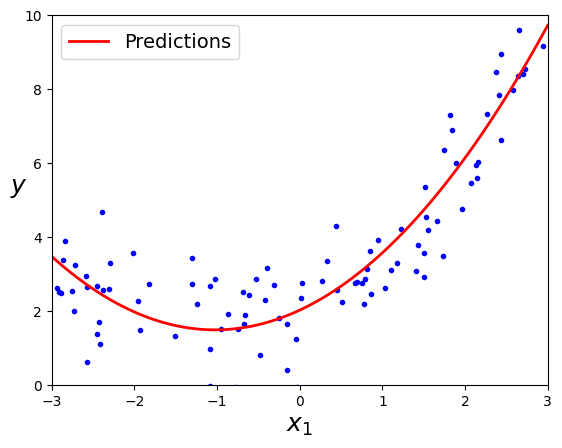

In [196]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


## Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [197]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [198]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [199]:
len(X),len(y)

(1000, 1000)

In [200]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

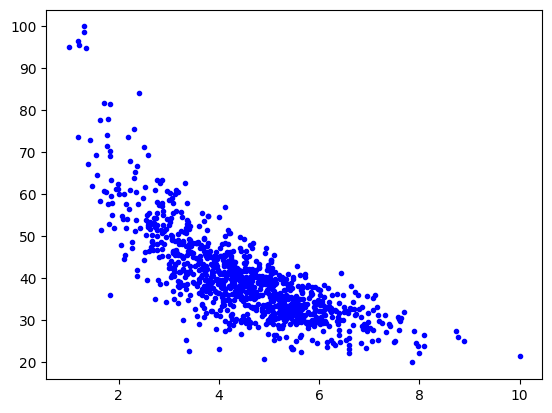

In [201]:
plt.plot(X,y,'b.')

In [202]:
# Divide los datos del costo de manufactura. Utiliza la función train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [203]:
# Realiza la Regresión Lineal

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_train)

In [204]:
# Generando errores y R^2

from sklearn import metrics
from sklearn.metrics import r2_score

mae_lineal = metrics.mean_absolute_error(y_train, y_pred)
r2_lineal = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('Score (R^2)',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.905332101451236
Root Mean Squared Error (RMSE): 6.844866083710475
Score (R^2) 0.5746524649404298


In [205]:
linear_reg.coef_, lin_reg.intercept_

(array([-5.98882699]), array([2.01873554]))

La ecuación es:

$\hat{y} =  2.01 - 5.98X$

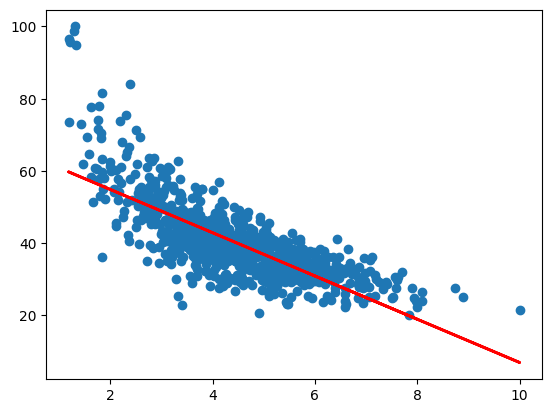

In [206]:
# Graficando la función del modelo

plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")

In [207]:
# Realiza la Regresión polinomial

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train) #Se obtienen los valores de las Características de la ecuación


In [208]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-16.40638102,   1.13136095]), 88.80179909112496)

La ecuación es:

$\hat{y} =  -16.40X + 1.13X^2 + 88.80$

In [209]:
# Generando errores y R^2

mae_polynomial = metrics.mean_absolute_error(y_train, y_pred)
r2_polynomial = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))


Error medio Absoluto (MAE): 4.905332101451236
Root Mean Squared Error: 6.844866083710475
r2_score 0.5746524649404298


c:\Users\gramos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


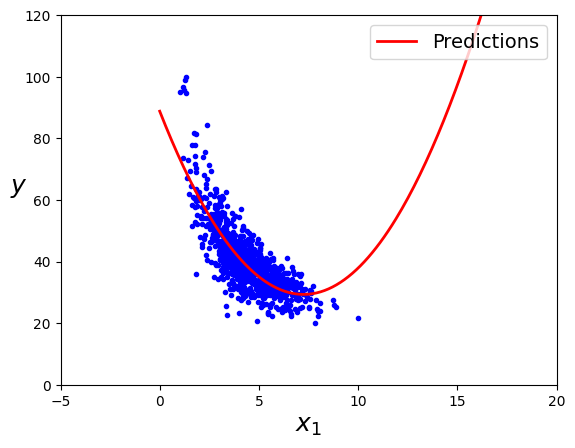

In [210]:
# Graficando la función del modelo

X_new=np.linspace(0, 100, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([-5, 20, 0, 120]);

In [211]:
# Realizando Lasso
from sklearn.linear_model import Lasso, Ridge
var_alpha = 0.5

modelo_lasso = Lasso(alpha=var_alpha)
modelo_lasso.fit(X_train,y_train)
y_pred = modelo_lasso.predict(X_train)

In [212]:
modelo_lasso.coef_, modelo_lasso.intercept_

(array([-5.70551675]), 65.5690517904203)

La ecuación es:

$\hat{y} =  -5.70X + 65.56$

In [213]:
mae_lasso = metrics.mean_absolute_error(y_train, y_pred)
r2_lasso = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.875739237444593
Root Mean Squared Error: 6.855205819259097
r2_score 0.5733664491932293


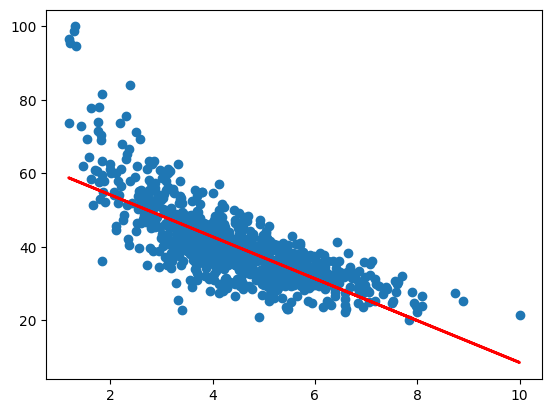

In [214]:
plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")

In [215]:
#Realizando Ridge
var_alpha = 30

modelo_ridge = Ridge(alpha=var_alpha)
modelo_ridge.fit(X_train,y_train)
y_pred = modelo_ridge.predict(X_train)
modelo_ridge.coef_, modelo_ridge.intercept_

(array([-5.87781073]), 66.33984979561133)

La ecuación es:

$\hat{y} =  -5.87X + 66.33$

In [216]:
mae_ridge = metrics.mean_absolute_error(y_train, y_pred)
r2_ridge = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.891449182849679
Root Mean Squared Error: 6.846454760702764
r2_score 0.57445499774291


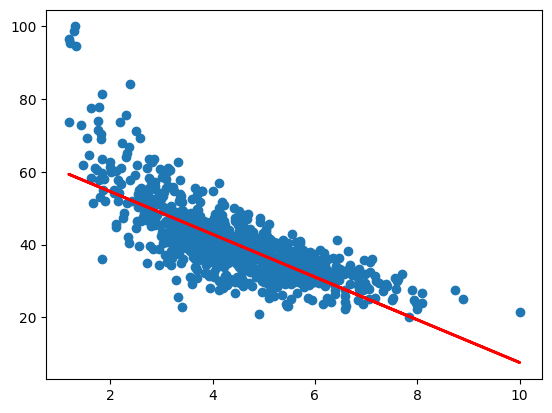

In [217]:
plt.scatter(X_train, y_train);
plt.plot(X_train, y_pred, "r-", linewidth=2, label="Predictions")

<AxesSubplot: xlabel='Errores'>

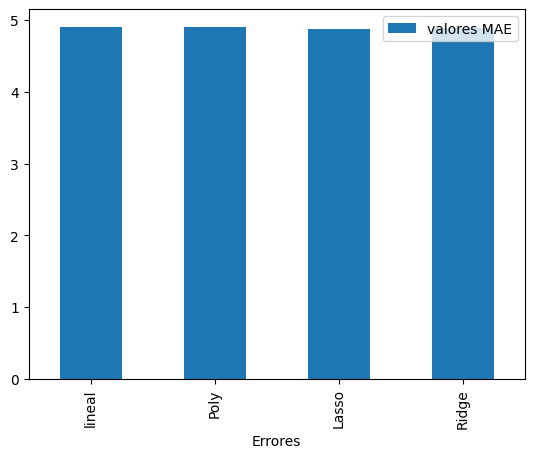

In [218]:
df_mae = pd.DataFrame({'Errores':["lineal","Poly","Lasso","Ridge"], "valores MAE":[mae_lineal,mae_polynomial,mae_lasso,mae_ridge]})
df_mae.plot.bar(x="Errores",y="valores MAE")

<AxesSubplot: xlabel='Errores'>

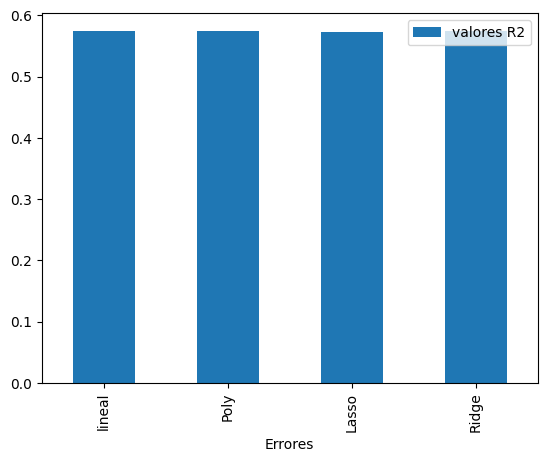

In [219]:
df_r2 = pd.DataFrame({'Errores':["lineal","Poly","Lasso","Ridge"], "valores R2":[r2_lineal,r2_polynomial,r2_lasso,r2_ridge]})
df_r2.plot.bar(x="Errores",y="valores R2")

Explica tus resultados, 

¿Qué método conviene más a la empresa?, ¿por que?,  - Se propone el uso del modelo de regresión polinomial ya que en todos los casos los errores son muy similares y el modelo polinomial sí integra una buena cantidad de valores en su curva.

¿Qué porcentajes de entrenamiento y evaluación usaste?, 
Entrenamiento 90% y evaluación 10%

¿que error tienes?, 
Los errores de MAE están entre 4.80 y 4.90
Los errores de RMSE están entre 6.80 y 6.90

¿es bueno?, ¿cómo lo sabes?
El error es alto, ya que se puede observar en Rcuadrada que el score es muy bajo con apenas el 57% por lo que no es preciso.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [220]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [222]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [223]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


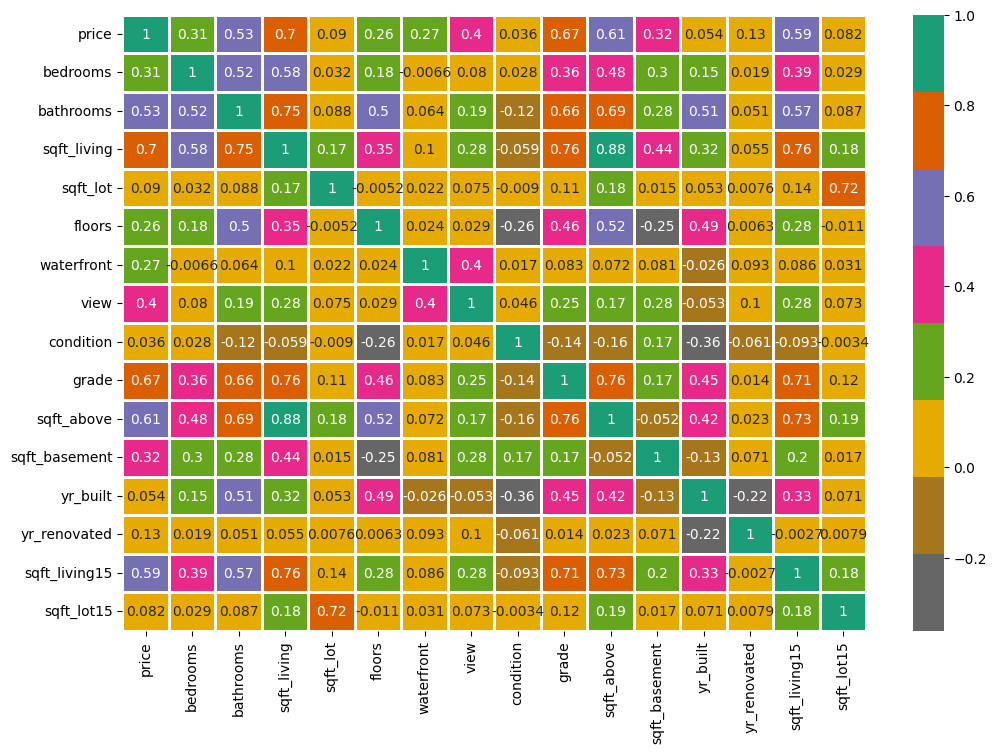

In [224]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [225]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Regresión Lineal.**


Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

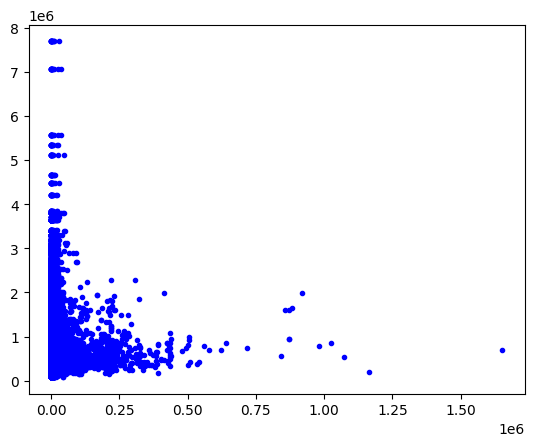

In [227]:
#tu codigo aquí
plt.plot(X_train,y_train,'b.')

In [228]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [229]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


pipe_num = Pipeline (steps=[("Scaler", StandardScaler())])
ct = ColumnTransformer(transformers = [('pipe_num', pipe_num,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15','price'])], remainder='passthrough')

df_temp = df.copy()
df_temp = pd.DataFrame(ct.fit_transform(df_temp))
df_temp.columns = df.columns

X = df_temp.drop("price", axis =1)
y = df_temp["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [230]:
#Regresion Multiple Linear
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf  

modelo_LR = smf.ols('y_train ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_lot + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15', data=X_train).fit()

y_pred_mlinear = modelo_LR.predict(X_train)

In [231]:
#Coeficientes para la ecuación
modelo_LR.params

Intercept        0.000021
bedrooms         0.296056
bathrooms        0.336071
sqft_living     -0.023637
sqft_lot        -0.038556
floors          -0.014235
waterfront      -0.053654
view             0.041269
condition       -0.127846
grade            0.289113
sqft_above       0.156469
sqft_basement   -0.104201
yr_built        -0.019509
yr_renovated    -0.004564
sqft_living15   -0.058665
sqft_lot15      -0.171706
dtype: float64

In [232]:
modelo_LR.mse_resid

0.6046737973833821

In [233]:
mae_lineal = metrics.mean_absolute_error(y_train, y_pred_mlinear)
r2_lineal = r2_score(y_train, y_pred_mlinear)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_mlinear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_mlinear)))
print('r2_score',r2_score(y_train, y_pred_mlinear))

Error medio Absoluto (MAE): 0.5681788471567046
Root Mean Squared Error: 0.7773078488933661
r2_score 0.4005402209348795


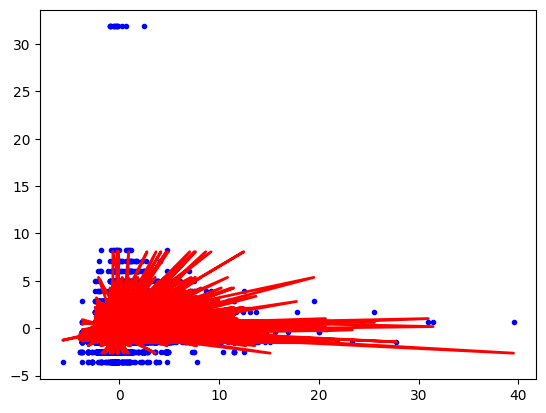

In [234]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_train, y_pred_mlinear, "r-", linewidth=2, label="Predictions")

In [235]:
# Regresión múltiple Polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train) #Se obtienen los valores de las Características de la ecuación

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)
y_pred_RMP = lin_reg.predict(X_poly)

print (pd.DataFrame(X_poly)), lin_reg.intercept_

            0         1         2         3         4         5         6    \
0      0.824835  1.818450 -0.073153  0.936506 -0.087173  4.914129 -0.629187   
1      3.097133  3.451690  0.802641  0.936506 -0.087173 -0.305759 -0.629187   
2      0.500221  0.871171 -0.120256  0.936506 -0.087173 -0.305759  0.907554   
3     -0.473621  1.274037 -0.033920 -0.915427 -0.087173  2.304185 -0.629187   
4      0.824835  1.099824 -0.223275  0.936506 -0.087173 -0.305759 -0.629187   
...         ...       ...       ...       ...       ...       ...       ...   
19446  0.175607 -0.174103 -0.131217  0.936506 -0.087173 -0.305759  0.907554   
19447 -1.447464 -0.914505 -0.277815  0.010539 -0.087173 -0.305759 -0.629187   
19448  0.175607 -0.326539 -0.187712  0.936506 -0.087173 -0.305759 -0.629187   
19449 -1.447464 -1.012500 -0.244014 -0.915427 -0.087173 -0.305759  0.907554   
19450 -1.447464 -0.685852 -0.173275 -0.915427 -0.087173 -0.305759  0.907554   

            7         8         9    ...       125 

(None, -5187267088.0197525)

In [236]:
#Coeficientes de la Ecuación
print(pd.DataFrame(lin_reg.coef_)), lin_reg.intercept_

                0
0    2.416638e-01
1   -4.924609e+10
2   -1.869038e-02
3    1.580429e-02
4   -5.905350e+10
..            ...
130  4.328847e-02
131  2.031326e-04
132  4.337311e-03
133  1.802760e-02
134 -1.376867e-02

[135 rows x 1 columns]


(None, -5187267088.0197525)

In [237]:
mae_poly = metrics.mean_absolute_error(y_train, y_pred_RMP)
r2_poly = r2_score(y_train, y_pred_RMP)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_RMP))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_RMP)))
print('r2_score',r2_score(y_train, y_pred_RMP))

Error medio Absoluto (MAE): 0.5359376477981744
Root Mean Squared Error: 0.7363816410021479
r2_score 0.4620030072912312


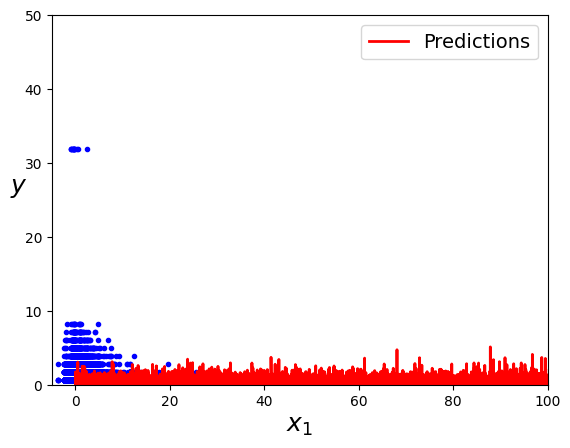

In [238]:
X_new=np.linspace(0, 100, 19451).reshape(19451, 1)
X_new_poly = poly_features.transform(X_train)
y_new = lin_reg.predict(X_new_poly)



plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.axis([-5, 100, 0, 50]);

In [239]:
#Realizando Lasso
var_alpha = 0.5

modelo_lasso = Lasso(alpha=var_alpha, max_iter=1000)
modelo_lasso.fit(X_train,y_train)
y_pred_lasso = modelo_lasso.predict(X_train)

In [240]:
modelo_lasso.coef_, modelo_lasso.intercept_

(array([ 0.        ,  0.07634285,  0.        ,  0.        , -0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 -0.0003736428823217611)

In [241]:
mae_lasso = metrics.mean_absolute_error(y_train, y_pred_lasso)
r2_lasso = r2_score(y_train, y_pred_lasso)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_lasso)))
print('r2_score',r2_score(y_train, y_pred_lasso))

Error medio Absoluto (MAE): 0.7500191988464725
Root Mean Squared Error: 0.9621704547378122
r2_score 0.08150250308324813


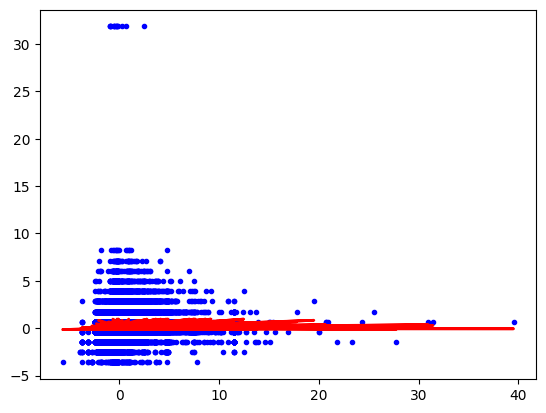

In [242]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_train, y_pred_lasso, "r-", linewidth=2, label="Predictions")

In [243]:
#Realizando Ridge
var_alpha = 30

modelo_ridge = Ridge(alpha=var_alpha)
modelo_ridge.fit(X_train,y_train)
y_pred_ridge = modelo_ridge.predict(X_train)
modelo_ridge.coef_, modelo_ridge.intercept_

(array([ 0.29527253,  0.33498479, -0.02361286, -0.03827139, -0.01440126,
        -0.05366904,  0.04132577, -0.12704378,  0.28795652,  0.15637922,
        -0.10352455, -0.01934252, -0.00403352, -0.05843366, -0.17048938]),
 2.4039455289067953e-05)

In [244]:
mae_ridge = metrics.mean_absolute_error(y_train, y_pred_ridge)
r2_ridge = r2_score(y_train, y_pred_ridge)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_ridge)))
print('r2_score',r2_score(y_train, y_pred_ridge))

Error medio Absoluto (MAE): 0.568162981120337
Root Mean Squared Error: 0.7773091849978555
r2_score 0.4005381601256608


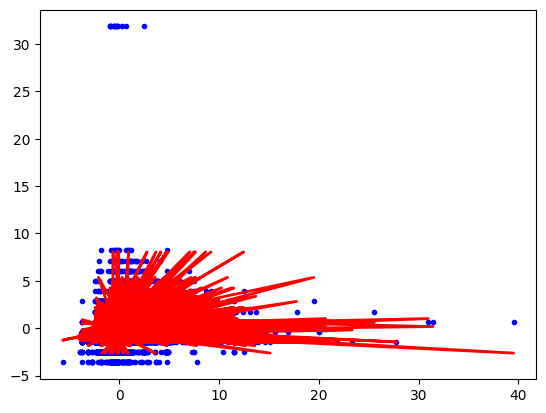

In [245]:
plt.plot(X_train,y_train,'b.')
plt.plot(X_train, y_pred_ridge, "r-", linewidth=2, label="Predictions")

<AxesSubplot: xlabel='Errores'>

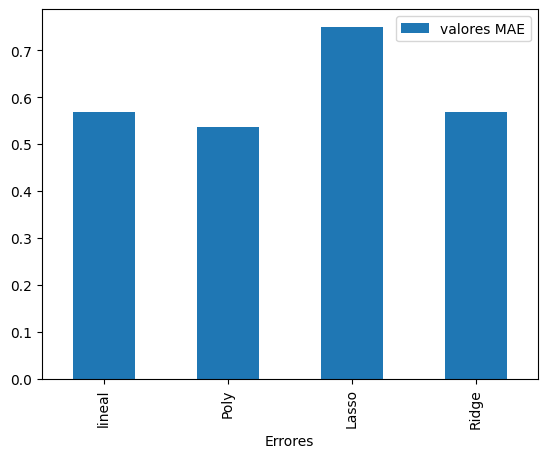

In [248]:
df_mae = pd.DataFrame({'Errores':["lineal","Poly","Lasso","Ridge"], "valores MAE":[mae_lineal,mae_poly,mae_lasso,mae_ridge]})
df_mae.plot.bar(x="Errores",y="valores MAE")

<AxesSubplot: xlabel='Errores'>

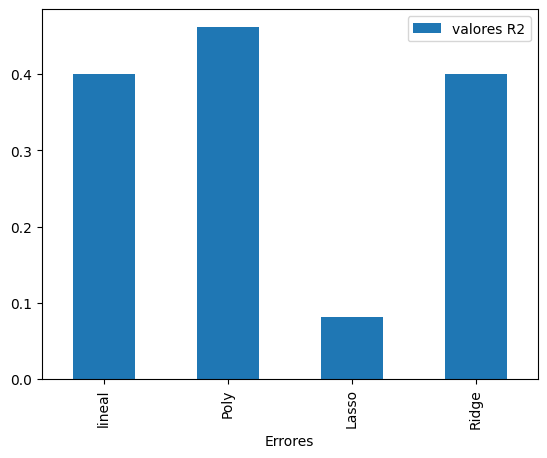

In [249]:
df_r2 = pd.DataFrame({'Errores':["lineal","Poly","Lasso","Ridge"], "valores R2":[r2_lineal,r2_poly,r2_lasso,r2_ridge]})
df_r2.plot.bar(x="Errores",y="valores R2")

Explica tus resultados, 

¿Qué método conviene más a la empresa?, ¿por que?,  - Se propone el uso del modelo de regresión múltiple polinomial ya que es el de mejor score aunque claramente un 46% es demasiado bajo.

¿Qué porcentajes de entrenamiento y evaluación usaste?, 
Entrenamiento 90% y evaluación 10%

¿que error tienes?, 
Los errores de MAE están entre 53 para 3 de los 4 modelos
Los errores de RMSE están entre 76 para 3 de los 4 modelos

¿es bueno?, ¿cómo lo sabes?
El error es alto, de hecho demasiado alto arriba del 50% , ya que se puede observar en Rcuadrada que el score es muy bajo con apenas el 46% por lo que no es preciso.